In [10]:
# import libraries
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize']=(12, 8) # adjusts the configuration to the plots we will create

# read in the data
df = pd.read_csv(r'C:\Users\azoni\Desktop\data\movies.csv')

In [8]:
# check the data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [15]:
# see if there's any missing data in percentage
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, (pct_missing)))
    

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [17]:
# see data types of columns
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [26]:
# change data type of some columns
df["votes"] = df["votes"].fillna(0).astype(int)

df["budget"] = df["budget"].fillna(0).astype("int")

df["gross"] = df["gross"].fillna(0).astype("int")

df["runtime"] = df["runtime"].fillna(0).astype("int")


In [58]:
# create a correct year column
df["year_correct"] = df["released"].astype(str).str.extract(r'(\d{4})')
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
0,6587,6,6,1980,1705,8.4,927000,2589,4014,1047,54,19000000,46998772,2319,146,1705
1,5573,6,1,1980,1492,5.8,65000,2269,1632,327,55,4500000,58853106,731,104,1492
2,5142,4,0,1980,1771,8.7,1200000,1111,2567,1745,55,18000000,538375067,1540,124,1771
3,286,4,4,1980,1492,7.7,221000,1301,2000,2246,55,3500000,83453539,1812,88,1492
4,1027,6,4,1980,1543,7.3,108000,1054,521,410,55,6000000,39846344,1777,98,1543


In [33]:
# order it by the gross revenue
df.sort_values(by = ["gross"], inplace = False, ascending = False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018
7480,The Lion King,PG,Animation,2019,"July 19, 2019 (United States)",6.9,222000,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000,1670727580,Walt Disney Pictures,118,2019
6653,Jurassic World,PG-13,Action,2015,"June 12, 2015 (United States)",7.0,593000,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000,1670516444,Universal Pictures,124,2015
6043,The Avengers,PG-13,Action,2012,"May 4, 2012 (United States)",8.0,1300000,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000,1518815515,Marvel Studios,143,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5033,Loving Annabelle,Not Rated,Drama,2006,"May 24, 2007 (Germany)",6.3,12000,Katherine Brooks,Katherine Brooks,Erin Kelly,United States,1000000,0,Big Easy Pictures,77,2007
7667,Tee em el,NaN,Horror,2020,"August 19, 2020 (United States)",5.7,7,Pereko Mosia,Pereko Mosia,Siyabonga Mabaso,South Africa,0,0,PK 65 Films,102,2020
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,-2147483648,Twentieth Century Fox,194,1997
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,-2147483648,Marvel Studios,181,2019


In [34]:
# sort the distinct values
df["company"].drop_duplicates().sort_values(ascending = False) # df.drop_duplicates()

7129                                thefyzz
5664                            micro_scope
6412               iDeal Partners Film Fund
4007                               i5 Films
6793                             i am OTHER
                       ...                 
3748                     1+2 Seisaku Iinkai
3024                        .406 Production
7525    "Weathering With You" Film Partners
4345        "DIA" Productions GmbH & Co. KG
408                                     NaN
Name: company, Length: 2386, dtype: object

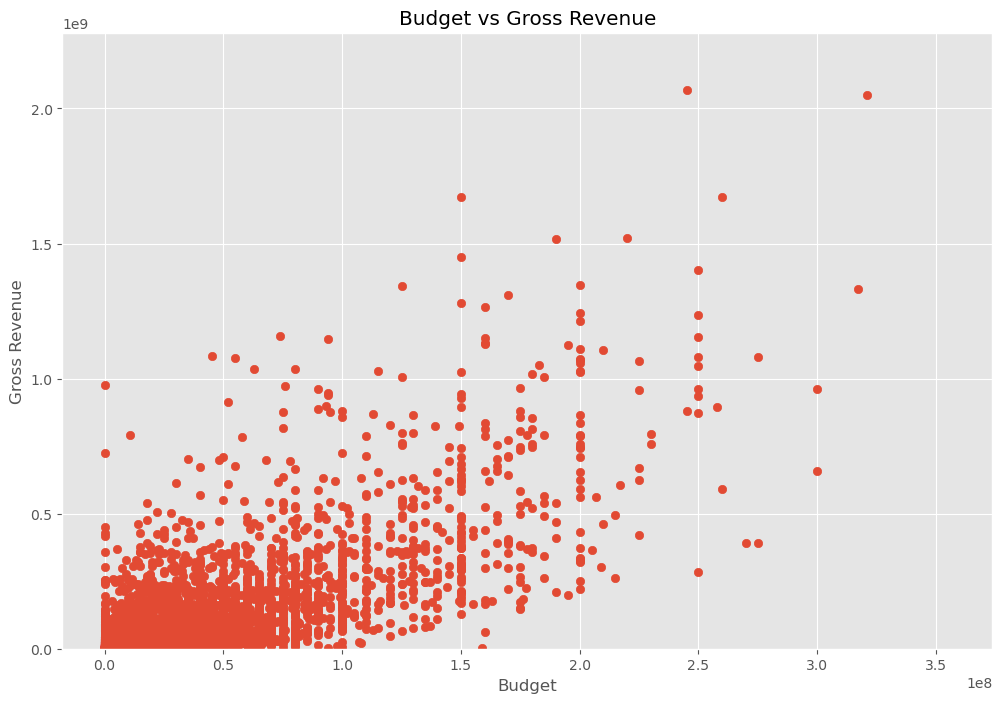

In [40]:
# let's see if there are correlations with the gross revenues
# budget seems a high correlation, so let's test it

# scatter plot with budget vs gross
plt.scatter(x = df["budget"], y = df["gross"])
plt.title("Budget vs Gross Revenue")
plt.xlabel("Budget")
plt.ylabel("Gross Revenue")
plt.ylim(0,)
plt.show()

(0.0, 2280371967.4)

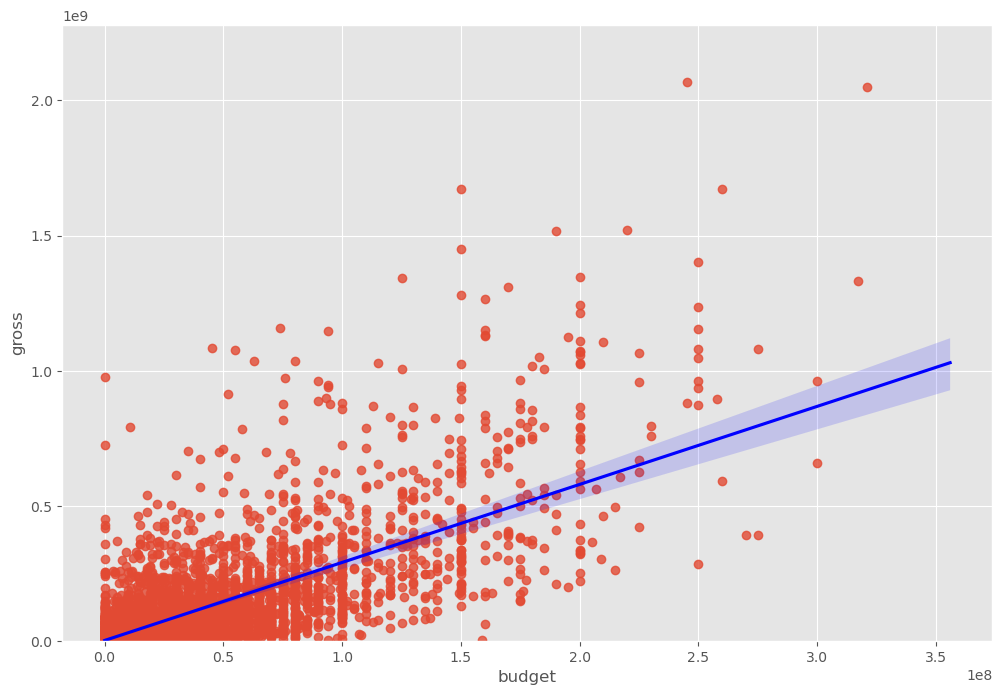

In [42]:
# plot budget vs gross using seaborn
sns.regplot(x = "budget", y = "gross", data = df, line_kws = {"color":"blue"})
plt.ylim(0,)

In [ ]:
# let's look at correlation
df.corr() #encountered an error because some numeric columns contain non-numeric values

In [44]:
# fix the error above
num_df = df.select_dtypes(include = ['number'])
num_df.corr()

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222427,0.309212,0.256331,0.116358
score,0.097995,1.000000,0.409182,0.055665,0.169406,0.398387
votes,0.222427,0.409182,1.000000,0.486931,0.573930,0.306984
budget,0.309212,0.055665,0.486931,1.000000,0.687124,0.268372
gross,0.256331,0.169406,0.573930,0.687124,1.000000,0.203616
runtime,0.116358,0.398387,0.306984,0.268372,0.203616,1.000000


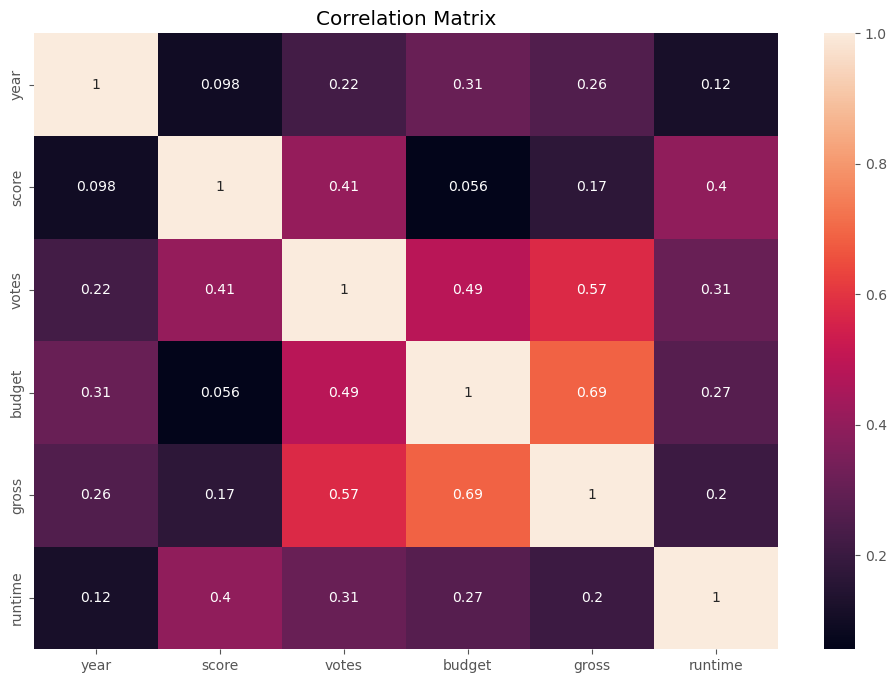

In [46]:
# visualize the correlation matrix
correlation_matrix = num_df.corr()
sns.heatmap(correlation_matrix, annot = True)
plt.title("Correlation Matrix")
plt.show()

In [59]:
# company seems a high correlation too but is not numeric???
# create a numeric representation of it
df_numcol = df
for col_name in df_numcol.columns:
    if(df_numcol[col_name].dtype == "object"):
        df_numcol[col_name] = df_numcol[col_name].astype("category")
        df_numcol[col_name] = df_numcol[col_name].cat.codes
df_numcol.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
0,6587,6,6,1980,1705,8.4,927000,2589,4014,1047,54,19000000,46998772,2319,146,705
1,5573,6,1,1980,1492,5.8,65000,2269,1632,327,55,4500000,58853106,731,104,492
2,5142,4,0,1980,1771,8.7,1200000,1111,2567,1745,55,18000000,538375067,1540,124,771
3,286,4,4,1980,1492,7.7,221000,1301,2000,2246,55,3500000,83453539,1812,88,492
4,1027,6,4,1980,1543,7.3,108000,1054,521,410,55,6000000,39846344,1777,98,543


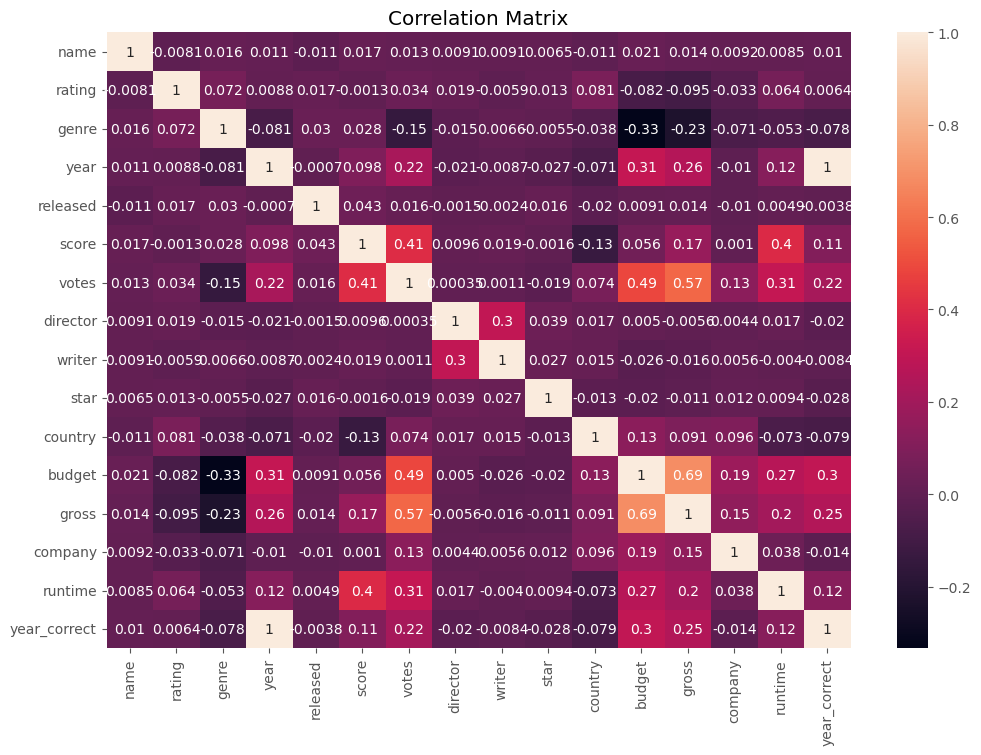

In [49]:
correlation_matrix = df_numcol.corr()
sns.heatmap(correlation_matrix, annot = True)
plt.title("Correlation Matrix")
plt.show()

In [53]:
# let's try to see the correlation clearly and quickly
corr_fast = df_numcol.corr()
corr_pairs = corr_fast.unstack()
corr_pairs

name          name            1.000000
              rating         -0.008069
              genre           0.016355
              year            0.011453
              released       -0.011311
              score           0.017097
              votes           0.013038
              director        0.009079
              writer          0.009081
              star            0.006472
              country        -0.010737
              budget          0.020548
              gross           0.013895
              company         0.009211
              runtime         0.008483
              year_correct    0.010225
rating        name           -0.008069
              rating          1.000000
              genre           0.072423
              year            0.008779
              released        0.016613
              score          -0.001314
              votes           0.033743
              director        0.019483
              writer         -0.005921
              star       

In [52]:
pd.set_option('display.max_rows', None)

In [54]:
# quicker
sort_pairs = corr_pairs.sort_values()
sort_pairs

genre         budget         -0.334021
budget        genre          -0.334021
gross         genre          -0.229534
genre         gross          -0.229534
votes         genre          -0.145296
genre         votes          -0.145296
score         country        -0.133348
country       score          -0.133348
rating        gross          -0.095355
gross         rating         -0.095355
rating        budget         -0.081939
budget        rating         -0.081939
genre         year           -0.081261
year          genre          -0.081261
year_correct  country        -0.079009
country       year_correct   -0.079009
year_correct  genre          -0.078210
genre         year_correct   -0.078210
runtime       country        -0.073319
country       runtime        -0.073319
genre         company        -0.071067
company       genre          -0.071067
country       year           -0.070938
year          country        -0.070938
genre         runtime        -0.052914
runtime       genre      

In [55]:
# summarize which ones really has high correlation
high_corr = sort_pairs[(sort_pairs) > 0.5]
high_corr

votes         gross           0.573930
gross         votes           0.573930
              budget          0.687124
budget        gross           0.687124
year_correct  year            0.996397
year          year_correct    0.996397
name          name            1.000000
company       company         1.000000
gross         gross           1.000000
budget        budget          1.000000
country       country         1.000000
star          star            1.000000
writer        writer          1.000000
director      director        1.000000
votes         votes           1.000000
score         score           1.000000
released      released        1.000000
year          year            1.000000
genre         genre           1.000000
rating        rating          1.000000
runtime       runtime         1.000000
year_correct  year_correct    1.000000
dtype: float64

In [ ]:
# the company is not necessarily correct, and missed on votes
# observation regarding correlation, votes and budget have the highest correlation to gross revenues